This notebook was used in an early stage of the quarter for preliminary visualization.

In [1]:
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data_pipeline.spatial_operations as so
import data_pipeline.fetch_fcc_data as fetch_fcc
import data_pipeline.fetch_census_data as fetch_census
from IPython.display import display
plt.rcParams['figure.figsize'] = [12, 12]
import geopandas as gpd
import contextily as cx
import warnings
warnings.filterwarnings("ignore")

In [2]:
full = gpd.read_file("../internet-access-map/data/broadband.geojson")
short = full[['geoid', 'f_broadband', 'population', 'geometry']]

baltimore = gpd.read_file("../neighborhood-data/baltimore/neighborhoods/baltimore.shp")
detroit = gpd.read_file("../neighborhood-data/detroit/neighborhoods/detroit.shp")
louisville = gpd.read_file("../neighborhood-data/louisville/neighborhoods/louisville.shp")

short.f_broadband = short.f_broadband*100 # convert to percentage

The below cell uses a function provided for us in the code (spatial operations) and displays a map of broadband percentage by census tract clipped to just show the city. No aggregation is involved.

In [3]:
def map_tracts(state_code, city_file, city_name):
    """
    Inputs:
        state_code: state FIPS code, int or string
        city_file: geodataframe with city neighborhoods
        city_name: string
        
    state_code filters the full broadband data by state to save time, since array processes are faster than
    geospatial processes. city_name is just for a nicer title. This function clips the tracts to the city exactly
    in order to (hopefully) avoid including water, since that was a concern for the Chicago functions.
    """
    dissolved = city_file.dissolve()
    dissolved.to_crs(epsg=4326, inplace=True)
    clipped = short[short.geoid.str.startswith(str(state_code))].clip(dissolved)
    so.simple_map(clipped, 'f_broadband', 'geoid', f'{city_name}: % Households with Broadband by Tract')

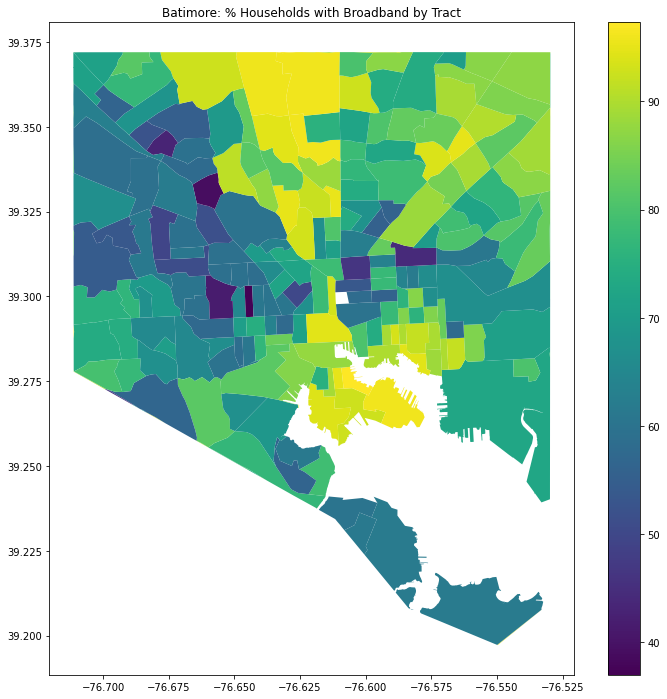

In [4]:
map_tracts(24, baltimore, 'Batimore')

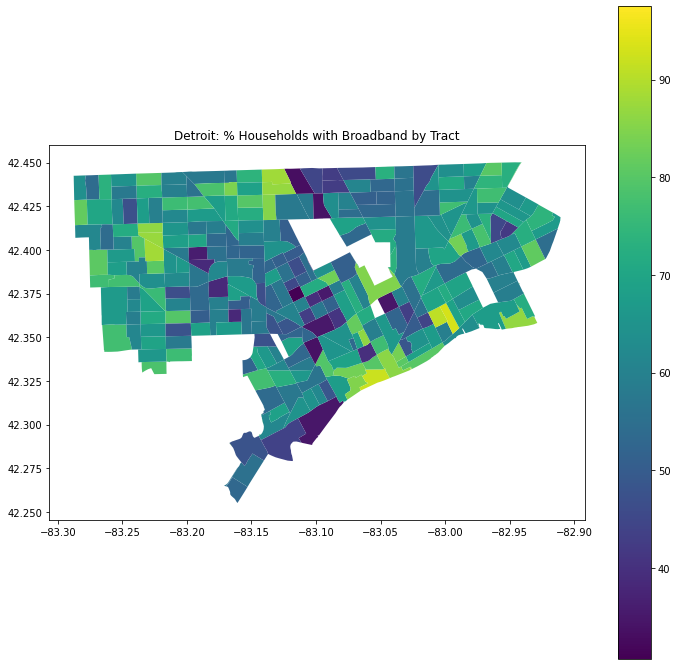

In [5]:
map_tracts(26, detroit, 'Detroit')

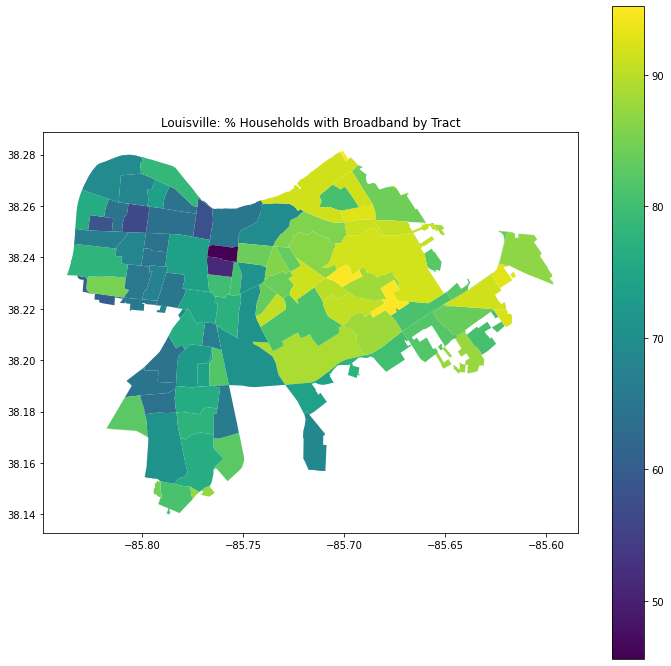

In [6]:
map_tracts(21, louisville, 'Louisville')